# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [32]:
# Your code here
## From GitHub
to_pick = ames.loc[:, (ames.dtypes != "object") & (ames.nunique() > 20)]
to_plot = to_pick[to_pick.columns[1:]]
lis = to_plot.columns
to_plot.info()
# to_pick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  GarageYrBlt    1379 non-null   float64
 14  GarageArea     1460 non-null   int64  
 15  WoodDeckSF     1460 non-null   int64  
 16  OpenPorchSF    1460 non-null   int64  
 17  EnclosedPorch  1460 non-null   int64  
 18  ScreenPo

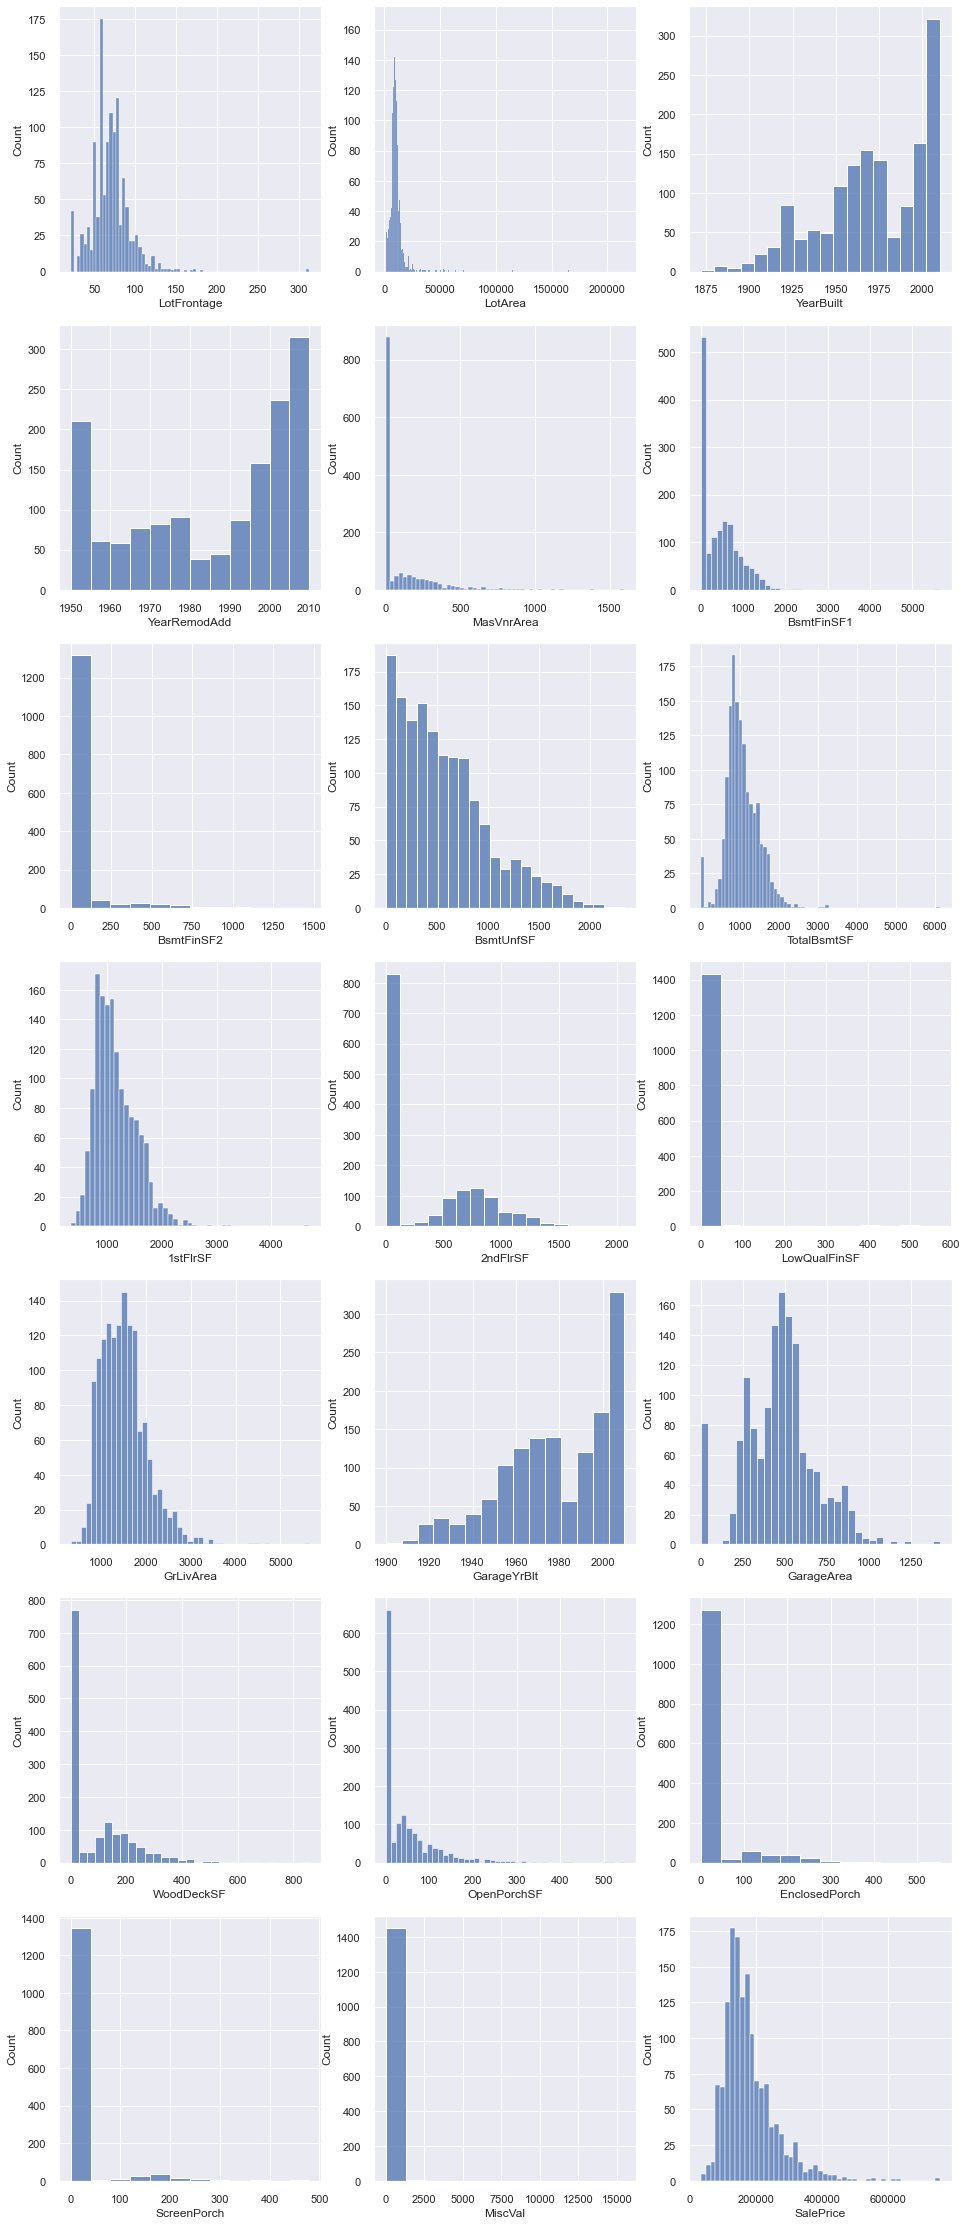

In [35]:
# sns.set(rc={"figure.figsize":(16, 40)})
fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (16,40))

for i,item in enumerate(lis):
    ax = axes[i//3][i%3]
    sns.histplot(to_plot[item], ax = ax);

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

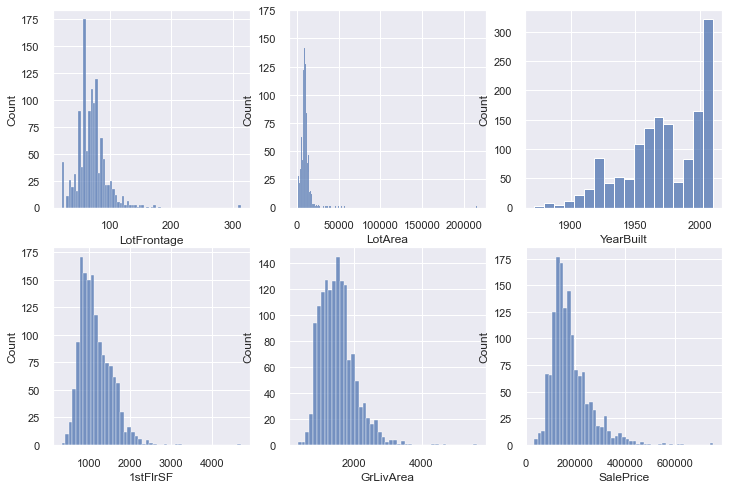

In [42]:
# Select non zero-inflated continuous features as ames_cont
to_select = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']
ames_cont = to_plot[to_select]

fig, axes = plt.subplots(nrows = int(len(to_select)/2-1), ncols = 3, 
                         figsize = (12,8))

for i,item in enumerate(to_select):
    ax = axes[i//3][i%3]
    sns.histplot(ames_cont[item], ax = ax);

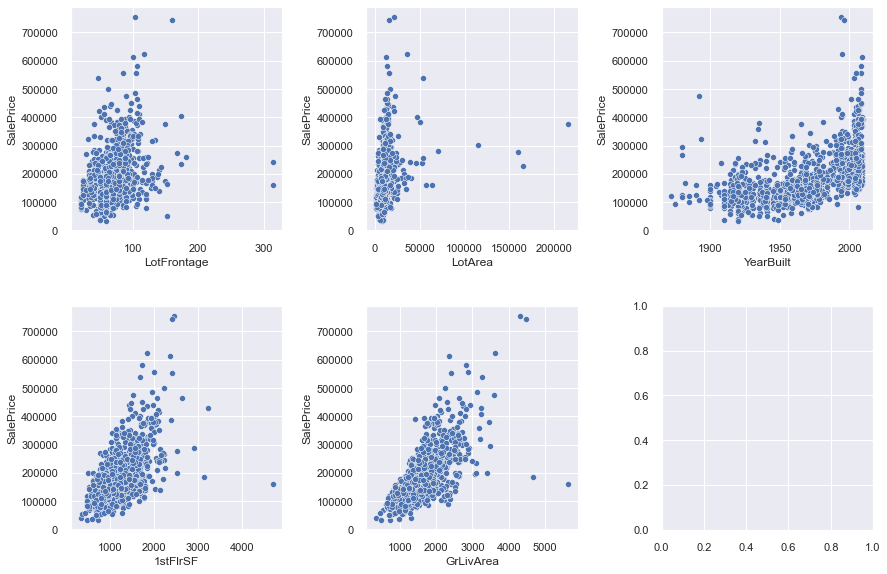

In [63]:
to_select = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']
ames_cont = to_plot[to_select]

fig, axes = plt.subplots(nrows = int(len(to_select)/2-1), ncols = 3, 
                         figsize = (12,8))
fig.tight_layout(h_pad = 4, w_pad = 4)
for i,item in enumerate(to_select[:-1]):
    ax = axes[i//3][i%3]
    sns.scatterplot(x = ames_cont[item], y = ames_cont['SalePrice'], ax = ax);

## Perform log transformations for the variables where it makes sense

In [57]:
# Your code here
import numpy as np

col = ames_cont.columns
ames_cont_log = pd.DataFrame([])

def col_log(data):
    
    return np.log(data)
    
# for item in col:
#     ames_cont_log[item + "_log"] = ames_cont[item].apply(col_log) 
ames_cont_log = ames_cont.apply(col_log) 

In [58]:
ames_cont_log.head()   

,LotFrontage,LotArea,YearBuilt,1stFlrSF,GrLivArea,SalePrice
0,4.174387,9.041922,7.602401,6.752270,7.444249,12.247694
1,4.382027,9.169518,7.588830,7.140453,7.140453,12.109011
2,4.219508,9.328123,7.601402,6.824374,7.487734,12.317167
3,4.094345,9.164296,7.557473,6.867974,7.448334,11.849398
4,4.430817,9.565214,7.600902,7.043160,7.695303,12.429216


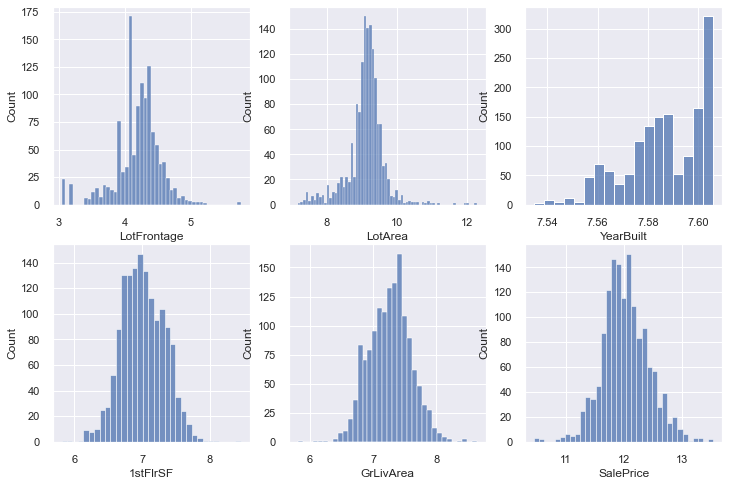

In [59]:
fig, axes = plt.subplots(nrows = int(len(to_select)/2-1), ncols = 3, 
                         figsize = (12,8))
to_select_log = ames_cont_log.columns
for i,item in enumerate(to_select_log):
    ax = axes[i//3][i%3]
    sns.histplot(ames_cont_log[item], ax = ax);

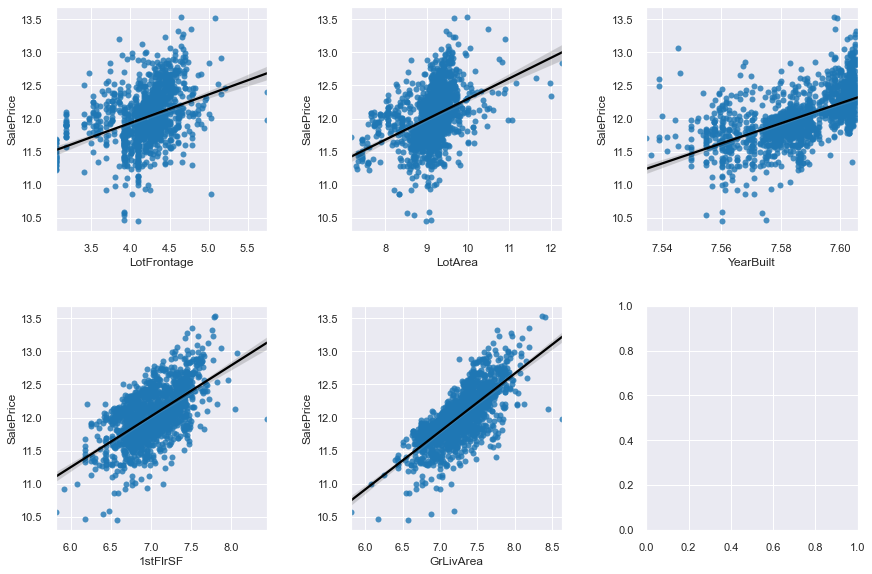

In [62]:
fig, axes = plt.subplots(nrows = int(len(to_select)/2-1), ncols = 3, 
                         figsize = (12,8))
fig.tight_layout(h_pad = 4, w_pad = 4)

for i,item in enumerate(to_select_log[:-1]):
    ax = axes[i//3][i%3]
    sns.regplot(x = ames_cont_log[item], y = ames_cont_log['SalePrice'], 
                scatter_kws={"color": "tab:blue"}, line_kws={"color": "black"},
                ax = ax);

In [64]:
def normalize(data):
    return (data - data.mean()) / data.std()

features_final = ames_cont_log.apply(normalize)

# features_final.hist(figsize  = [8, 8]);

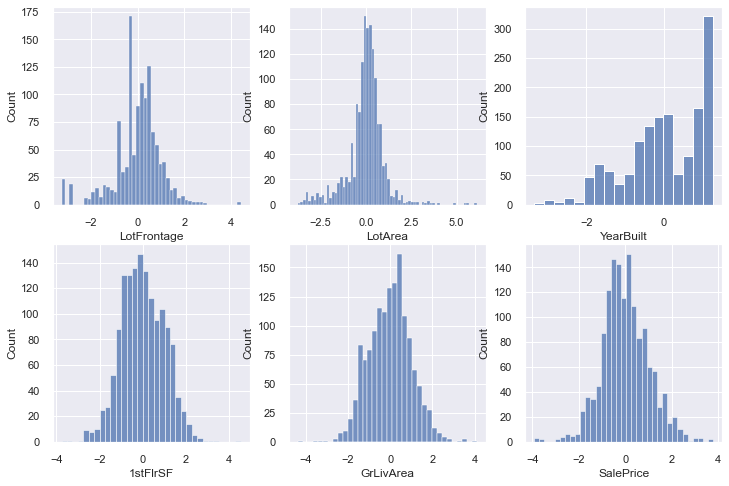

In [65]:
fig, axes = plt.subplots(nrows = int(len(to_select)/2-1), ncols = 3, 
                         figsize = (12,8))
to_select_log = features_final.columns
for i,item in enumerate(to_select_log):
    ax = axes[i//3][i%3]
    sns.histplot(features_final[item], ax = ax);

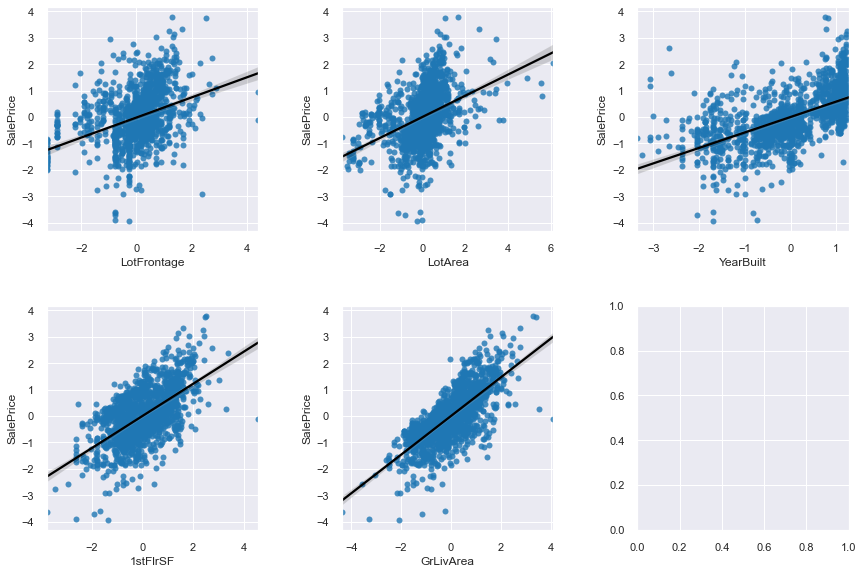

In [66]:
fig, axes = plt.subplots(nrows = int(len(to_select)/2-1), ncols = 3, 
                         figsize = (12,8))
fig.tight_layout(h_pad = 4, w_pad = 4)

for i,item in enumerate(to_select_log[:-1]):
    ax = axes[i//3][i%3]
    sns.regplot(x = features_final[item], y = features_final['SalePrice'], 
                scatter_kws={"color": "tab:blue"}, line_kws={"color": "black"},
                ax = ax);

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [ ]:
# Your code here

Index(['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea',
       'SalePrice'],
      dtype='object')


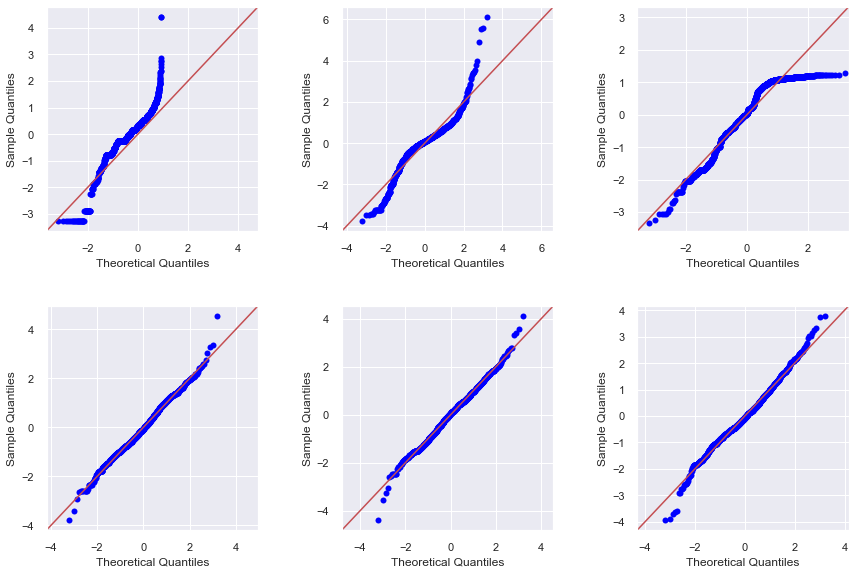

In [89]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = int(len(to_select)/2-1), ncols = 3, 
                         figsize = (12,8))
fig.tight_layout(h_pad = 4, w_pad = 4)

for i,item in enumerate(to_select_log):
    ax = axes[i//3][i%3]
    fig = sm.qqplot(features_final[item], line='45', ax = ax);
print(to_select_log)
  
    

In [93]:
import scipy.stats as stats
alpha = 0.05
for i,item in enumerate(features_final.columns):
    results = stats.kstest(features_final[item], 'norm')
    if results.pvalue < alpha:
        print(f"{item}: ", results.pvalue, "---- Not Normal")
    else:
        print(f"{item}: ", results.pvalue, "---- Cannot say")

LotFrontage:  nan ---- Cannot say
LotArea:  3.6842560351374844e-19 ---- Not Normal
YearBuilt:  4.336818809563862e-19 ---- Not Normal
1stFlrSF:  0.24583391534551713 ---- Cannot say
GrLivArea:  0.18824723813817024 ---- Cannot say
SalePrice:  0.014665968087434231 ---- Not Normal


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [96]:
features_final["LotFrontage"]

0      -0.047224
1       0.541293
2       0.080662
3      -0.274090
4       0.679580
          ...   
1455   -0.181153
1456    0.713122
1457   -0.003951
1458    0.080662
1459    0.358370
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
### From GitHub

# Commentary:

# We decided not to include the zero inflated features anymore
# We decided to perform log transformations on the data, 
# except for "YearBuilt" where the logtransforms did not improve the skewness.


## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!